In [1]:
from utils.io import load_yaml

import os
import pandas as pd

# Load F-MAP Log

In [2]:
def load_fmap_log(folder_path):
    csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
                 if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.csv')]
    aggregate_result = pd.DataFrame()
    for record in csv_files:
        df = pd.read_csv(record)
        aggregate_result = aggregate_result.append(df.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False)
 .agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])
    return aggregate_result

In [3]:
df = load_fmap_log(folder_path='tables/CDsVinyl_fmap/')

In [4]:
filtered_df = df.loc[(df['F-MAP@5'] != 0) & (df['F-MAP@10'] != 0) & (df['F-MAP@20'] != 0)]
filtered_df

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.027107,0.028075,0.029163
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.022160,0.024864,0.025901
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.025540,0.025579,0.026420
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.023867,0.025123,0.024983
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.025787,0.027533,0.026302
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.024107,0.024742,0.024467
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.026067,0.025072,0.026176
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.028573,0.031457,0.032823
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.025660,0.025876,0.026653
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.024967,0.024124,0.025855


# Bar Plot for best beta

In [5]:
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def pandas_bar_plot(df, x, y, hue, x_name, y_name, folder='figures', name='unknown', save=True):
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.barplot(ax=ax, x=x, y=y, hue=hue, data=df, errwidth=1, edgecolor='black', facecolor=(1, 1, 1, 0)) #, errwidth=0.5

    num_category = len(df[x].unique())
    hatch = None
    hatches = itertools.cycle(['//', '**', '////', '----', 'xxxx', '\\\\\\\\', ' ', '\\', '...', 'OOO', "++++++++"])
    for i, bar in enumerate(ax.patches):
        if i % num_category == 0:
            hatch = next(hatches)
        bar.set_hatch(hatch)

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.xticks(rotation=15)
    plt.legend(loc='upper left', ncol=5)
    # if 'Precision' not in y:
    ax.legend_.remove()
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        plt.savefig("{2}/{0}/{1}_bar.pdf".format(folder, name, fig_path), format="pdf")
        plt.savefig("{2}/{0}/{1}_bar.png".format(folder, name, fig_path), format="png")

        fig_leg = plt.figure(figsize=(12, 0.7))
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=10)
        ax_leg.axis('off')
        fig_leg.savefig('figs/bar_legend.pdf', format='pdf')

    else:
        plt.show()
    plt.close()

In [6]:
def return_barplot_df(df):
    df_fmap5 = df[['model', 'F-MAP@5']]
    df_fmap5.loc[:, 'Metric'] = ['F-MAP@5']*len(df_fmap5)
    df_fmap5.rename(columns={'F-MAP@5':'F-MAP', 'model':'Model'}, inplace=True)

    df_fmap10 = df[['model', 'F-MAP@10']]
    df_fmap10.loc[:, 'Metric'] = ['F-MAP@10']*len(df_fmap10)
    df_fmap10.rename(columns={'F-MAP@10':'F-MAP', 'model':'Model'}, inplace=True)

    df_fmap20 = df[['model', 'F-MAP@20']]
    df_fmap20.loc[:, 'Metric'] = ['F-MAP@20']*len(df_fmap20)
    df_fmap20.rename(columns={'F-MAP@20':'F-MAP', 'model':'Model'}, inplace=True)

    df_fmap5 = df_fmap5.sort_values('Model', ascending=False)
    df_fmap10 = df_fmap10.sort_values('Model', ascending=False)
    df_fmap20 = df_fmap20.sort_values('Model', ascending=False)

    makeup_df = df_fmap5.append(df_fmap10).append(df_fmap20)

    makeup_df['Metric'] = makeup_df['Metric'].apply(lambda m: m.replace('F-MAP@', 'N='))
    
    return makeup_df

In [7]:
bar_df = return_barplot_df(filtered_df.loc[filtered_df['beta'] == 0.0001])
bar_df

/home/kai/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/kai/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/kai/.local/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,Model,F-MAP,Metric
1,E-CDE-VAE,0.027507,N=5
1,E-CDE-VAE,0.026833,N=5
1,E-CDE-VAE,0.025973,N=5
1,E-CDE-VAE,0.026433,N=5
1,E-CDE-VAE,0.026867,N=5
1,E-CDE-VAE,0.024847,N=5
1,E-CDE-VAE,0.029720,N=5
1,E-CDE-VAE,0.024347,N=5
1,E-CDE-VAE,0.026307,N=5
1,E-CDE-VAE,0.021900,N=5


No handles with labels found to put in legend.


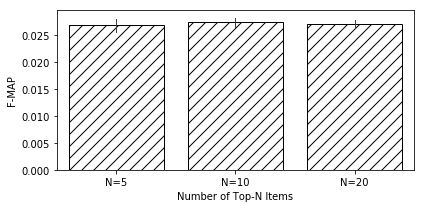

In [8]:
pandas_bar_plot(df=bar_df, x='Metric', y='F-MAP', hue=None, x_name='Number of Top-N Items', y_name='F-MAP', folder="CDsVinyl", name='CDsVinyl_FMAP', save=True)

# Point Plot for different beta

In [9]:
def return_pointplot_df(df):
    df_fmap5 = df[['beta', 'F-MAP@5']]
    df_fmap5.loc[:, 'Metric'] = ['F-MAP@5']*len(df_fmap5)
    df_fmap5.rename(columns={'F-MAP@5':'F-MAP', 'beta':'Beta'}, inplace=True)
    
    df_fmap10 = df[['beta', 'F-MAP@10']]
    df_fmap10.loc[:, 'Metric'] = ['F-MAP@10']*len(df_fmap10)
    df_fmap10.rename(columns={'F-MAP@10':'F-MAP', 'beta':'Beta'}, inplace=True)

    df_fmap20 = df[['beta', 'F-MAP@20']]
    df_fmap20.loc[:, 'Metric'] = ['F-MAP@20']*len(df_fmap20)
    df_fmap20.rename(columns={'F-MAP@20':'F-MAP', 'beta':'Beta'}, inplace=True)
    
    return df_fmap5, df_fmap10, df_fmap20

In [10]:
df_fmap5, df_fmap10, df_fmap20 = return_pointplot_df(filtered_df)

In [12]:
def pandas_point_plot(df, x, y, hue, x_name, y_name, folder='figures', name='unknown', save=True):
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.pointplot(ax=ax, x=x, y=y, hue=hue, data=df, linestyles=["--"])

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    #plt.xticks(rotation=15)
    plt.legend(loc='upper right', ncol=5)

#     ax.legend_.remove()
    plt.tight_layout()
    if save:
        fig_path = load_yaml('config/global.yml', key='path')['figs']
        plt.savefig("{2}/{0}/{1}_line.pdf".format(folder, name, fig_path), format="pdf")
        plt.savefig("{2}/{0}/{1}_line.png".format(folder, name, fig_path), format="png")

        fig_leg = plt.figure(figsize=(12, 0.7))
        ax_leg = fig_leg.add_subplot(111)
        ax_leg.legend(*ax.get_legend_handles_labels(), loc='center', ncol=10)
        ax_leg.axis('off')
        fig_leg.savefig('figs/line_legend.pdf', format='pdf')

    else:
        plt.show()
    plt.close()

No handles with labels found to put in legend.


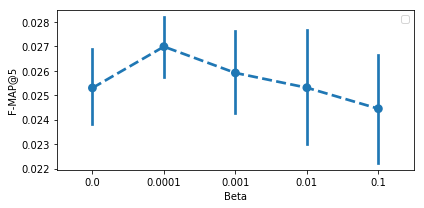

In [12]:
pandas_point_plot(df=df_fmap5.loc[df_fmap5['Beta'] != 1.0], x="Beta", y="F-MAP", hue=None, x_name="Beta", y_name="F-MAP@5", folder='CDsVinyl', name='CDsVinyl_FMAP5_beta', save=True)

No handles with labels found to put in legend.


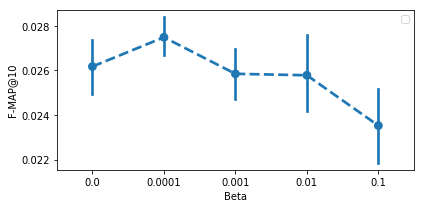

In [13]:
pandas_point_plot(df=df_fmap10.loc[df_fmap10['Beta'] != 1.0], x="Beta", y="F-MAP", hue=None, x_name="Beta", y_name="F-MAP@10", folder='CDsVinyl', name='CDsVinyl_FMAP10_beta', save=True)

No handles with labels found to put in legend.


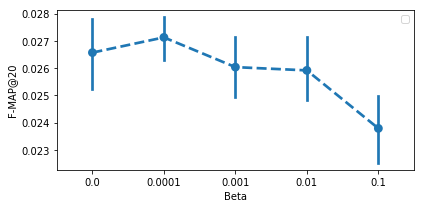

In [14]:
pandas_point_plot(df=df_fmap20.loc[df_fmap20['Beta'] != 1.0], x="Beta", y="F-MAP", hue=None, x_name="Beta", y_name="F-MAP@20", folder='CDsVinyl', name='CDsVinyl_FMAP20_beta', save=True)

In [15]:
(filtered_df.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False)
.agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,200,0.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.025297,0.026176,0.026567
1,E-CDE-VAE,200,0.0001,0.01,1,1,1,0.0001,600,0.4,Adam,0.026987,0.027489,0.027125
2,E-CDE-VAE,200,0.0010,0.01,1,1,1,0.0001,600,0.4,Adam,0.025912,0.025850,0.026034
3,E-CDE-VAE,200,0.0100,0.01,1,1,1,0.0001,600,0.4,Adam,0.025307,0.025785,0.025915
4,E-CDE-VAE,200,0.1000,0.01,1,1,1,0.0001,600,0.4,Adam,0.024448,0.023525,0.023787
5,E-CDE-VAE,200,1.0000,0.01,1,1,1,0.0001,600,0.4,Adam,0.001084,0.001433,0.001704


In [16]:
df = load_fmap_log(folder_path='tables/beer_fmap/')
filtered_df = df.loc[(df['F-MAP@5'] != 0) & (df['F-MAP@10'] != 0) & (df['F-MAP@20'] != 0)]

In [17]:
bar_df = return_barplot_df(filtered_df.loc[filtered_df['beta'] == 1])

No handles with labels found to put in legend.


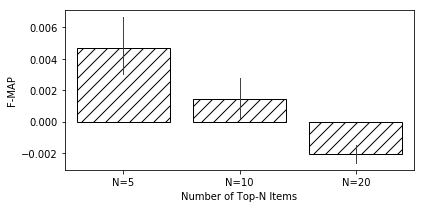

In [18]:
pandas_bar_plot(df=bar_df, x='Metric', y='F-MAP', hue=None, x_name='Number of Top-N Items', y_name='F-MAP', folder='beer', name='beer_FMAP', save=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


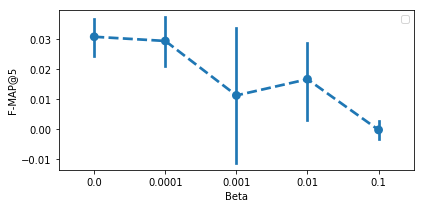

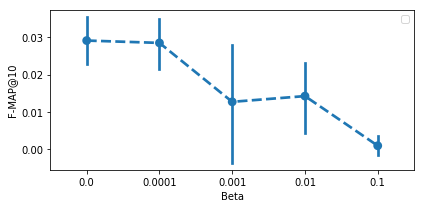

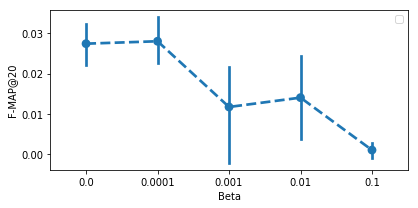

In [19]:
df_fmap5, df_fmap10, df_fmap20 = return_pointplot_df(filtered_df)
pandas_point_plot(df=df_fmap5.loc[df_fmap5['Beta'] != 1.0], x="Beta", y="F-MAP", hue=None, x_name="Beta", y_name="F-MAP@5", folder='beer', name='beer_FMAP5_beta', save=True)
pandas_point_plot(df=df_fmap10.loc[df_fmap10['Beta'] != 1.0], x="Beta", y="F-MAP", hue=None, x_name="Beta", y_name="F-MAP@10", folder='beer', name='beer_FMAP10_beta', save=True)
pandas_point_plot(df=df_fmap20.loc[df_fmap20['Beta'] != 1.0], x="Beta", y="F-MAP", hue=None, x_name="Beta", y_name="F-MAP@20", folder='beer', name='beer_FMAP20_beta', save=True)

In [20]:
(filtered_df.groupby(['model', 'rank', 'beta', 'lambda_l2', 'lambda_keyphrase', 'lambda_latent', 'lambda_rating', 'learning_rate', 'epoch', 'corruption', 'optimizer'], as_index=False)
.agg({'F-MAP@5':'mean', 'F-MAP@10':'mean','F-MAP@20':'mean'})).sort_values(by=['beta'])

,model,rank,beta,lambda_l2,lambda_keyphrase,lambda_latent,lambda_rating,learning_rate,epoch,corruption,optimizer,F-MAP@5,F-MAP@10,F-MAP@20
0,E-CDE-VAE,100,0.0000,0.001,1,1,1,0.0005,600,0.4,Adam,0.030666,0.029173,0.027408
1,E-CDE-VAE,100,0.0001,0.001,1,1,1,0.0005,600,0.4,Adam,0.029268,0.028542,0.028006
2,E-CDE-VAE,100,0.0010,0.001,1,1,1,0.0005,600,0.4,Adam,0.011167,0.012665,0.011731
3,E-CDE-VAE,100,0.0100,0.001,1,1,1,0.0005,600,0.4,Adam,0.016550,0.014210,0.014044
4,E-CDE-VAE,100,0.1000,0.001,1,1,1,0.0005,600,0.4,Adam,-0.000301,0.000839,0.001059
5,E-CDE-VAE,100,1.0000,0.001,1,1,1,0.0005,600,0.4,Adam,0.004712,0.001448,-0.002067
